In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading in the data
df = pd.read_csv('/content/World Energy Consumption.csv')
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [ ]:
# Extend the columns for better view
pd.set_option('display.max_columns', None)

In [ ]:
# Check the extension of column names
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.60,1.519,NaN,500.231,NaN,NaN,NaN,NaN,NaN,71.03,NaN,NaN,NaN,NaN,19.268,NaN,368.65,368.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295.75,NaN,NaN,80.225,NaN,NaN,NaN,NaN,NaN,163.22,NaN,NaN,NaN,NaN,NaN,44.275,NaN,184.41,NaN,NaN,NaN,NaN,50.37,NaN,13.663,NaN,NaN,NaN,NaN,NaN,72.90,NaN,19.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,61.50,NaN,NaN,NaN,NaN,NaN,16.682,NaN,NaN,22.53,16.93,NaN,NaN,NaN,NaN,NaN,6.111,4.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.90,NaN,19.775,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.02,1.516,NaN,499.358,NaN,NaN,NaN,NaN,NaN,80.02,NaN,NaN,NaN,NaN,20.147,NaN,397.19,397.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320.51,NaN,NaN,80.694,NaN,NaN,NaN,NaN,NaN,185.35,NaN,NaN,NaN,NaN,NaN,46.665,NaN,198.34,NaN,NaN,NaN,NaN,54.26,NaN,13.661,NaN,NaN,NaN,NaN,NaN,76.68,NaN,19.306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,55.14,NaN,NaN,NaN,NaN,NaN,13.883,NaN,NaN,22.42,16.40,NaN,NaN,NaN,NaN,NaN,5.645,4.129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.68,NaN,19.306,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,Na

In [ ]:
df.tail()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
14068,North America,2018,NaN,585864285.0,NaN,-1.001,-4.398,742.032,434.730,146.860,86.04,1.622,1.288,381.459,-5.179,-221.200,6913.208,4050.202,2099.804,1230.200,-2.310,-111.011,8012.996,4694.528,23.194,12.002,5301.25,5303.930,15.717,2.902,951.723,57602.539,NaN,3.441,916.555,5325.056,3119.760,47035.895,27556.650,58.820,81.656,9.622,921.582,10499.191,2974.819,1742.84,17920.859,10.316,1019.777,18613.406,10904.930,32.859,31.111,2023.23,-2.151,-52.609,1879.336,1246.859,730.49,3207.801,13.773,5.569,0.886,35.172,6190.621,3728.116,2184.17,10566.647,41.180,18.344,-2.68,-0.051,0.454,-3.261,2445.270,1562.529,915.43,4173.782,17.259,7.246,1.690,216.173,13007.258,250.433,146.72,22201.828,11.736,1265.783,20570.320,12051.416,2.766,38.543,307.187,113.75,27.71,-2.264,-7.362,194.158,47.298,524.332,2.145,0.522,0.910,9053.171,33747.270,1.136,38.433,3745.352,2165.587,1268.74,6392.865,23.921,11.098,22.311,47.992,270.225,172.275,100.93,461.242,1.903,0.801,7.488,54.810,853.873,552.295,323.57,1457.458,6.101,2.530
14069,North America,2019,NaN,590497015.0,NaN,2.706,11.765,756.135,446.495,139.137,82.16,1.568,1.333,366.363,-13.563,-549.312,5928.718,3500.890,1771.948,1046.330,-6.962,-326.850,7396.614,4367.678,19.968,10.448,523

In [ ]:
# Rename columns for clarity
df = df.rename(columns={
    'country': 'Country',
    'year': 'Year',
    'iso_code': 'ISO_Code',
    'population': 'Population',
    'energy_per_capita': 'Energy_Per_Capita',
    'fossil_fuel_consumption': 'Fossil_Fuel_Consumption',
    'greenhouse_gas_emissions': 'Greenhouse_Gas_Emissions',
    'hydro_elec_per_capita': 'Hydro_Elec_Per_Capita',
    'hydro_energy_per_capita': 'Hydro_Energy_Per_Capita',
    'renewables_energy_per_capita': 'Renewable_Energy_Per_Capita',
    'solar_energy_per_capita': 'Solar_Energy_Per_Capita',
    'wind_energy_per_capita': 'Wind_Energy_Per_Capita',
    'wind_electricity': 'Wind_Electricity',
    'gdp': 'GDP'
})

In [ ]:
# Checking updated columns
df.head()

,Country,Year,ISO_Code,Population,GDP,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,Energy_Per_Capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,Fossil_Fuel_Consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,Greenhouse_Gas_Emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,Hydro_Elec_Per_Capita,hydro_electricity,Hydro_Energy_Per_Capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,Renewable_Energy_Per_Capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,Solar_Energy_Per_Capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,Wind_Electricity,Wind_Energy_Per_Capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.60,1.519,NaN,500.231,NaN,NaN,NaN,NaN,NaN,71.03,NaN,NaN,NaN,NaN,19.268,NaN,368.65,368.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295.75,NaN,NaN,80.225,NaN,NaN,NaN,NaN,NaN,163.22,NaN,NaN,NaN,NaN,NaN,44.275,NaN,184.41,NaN,NaN,NaN,NaN,50.37,NaN,13.663,NaN,NaN,NaN,NaN,NaN,72.90,NaN,19.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,61.50,NaN,NaN,NaN,NaN,NaN,16.682,NaN,NaN,22.53,16.93,NaN,NaN,NaN,NaN,NaN,6.111,4.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.90,NaN,19.775,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.02,1.516,NaN,499.358,NaN,NaN,NaN,NaN,NaN,80.02,NaN,NaN,NaN,NaN,20.147,NaN,397.19,397.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320.51,NaN,NaN,80.694,NaN,NaN,NaN,NaN,NaN,185.35,NaN,NaN,NaN,NaN,NaN,46.665,NaN,198.34,NaN,NaN,NaN,NaN,54.26,NaN,13.661,NaN,NaN,NaN,NaN,NaN,76.68,NaN,19.306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,55.14,NaN,NaN,NaN,NaN,NaN,13.883,NaN,NaN,22.42,16.40,NaN,NaN,NaN,NaN,NaN,5.645,4.129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.68,NaN,19.306,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN

In [ ]:
# Filtering for select columns
df = df.loc[:, ['Country', 'Year', 'ISO_Code', 'Population', 'GDP',
                'Energy_Per_Capita', 'Fossil_Fuel_Consumption',
                'Greenhouse_Gas_Emissions', 'Hydro_Elec_Per_Capita',
                'Hydro_Energy_Per_Capita', 'Renewable_Energy_Per_Capita',
                'Solar_Energy_Per_Capita', 'Wind_Energy_Per_Capita',
                'Wind_Electricity']]

In [ ]:
# Checking updated columns in dataset
df.head()

,Country,Year,ISO_Code,Population,GDP,Energy_Per_Capita,Fossil_Fuel_Consumption,Greenhouse_Gas_Emissions,Hydro_Elec_Per_Capita,Hydro_Energy_Per_Capita,Renewable_Energy_Per_Capita,Solar_Energy_Per_Capita,Wind_Energy_Per_Capita,Wind_Electricity
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,184.41,NaN,NaN,NaN,NaN,NaN,0.0
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,198.34,NaN,NaN,NaN,NaN,NaN,0.0
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,213.80,NaN,NaN,NaN,NaN,NaN,0.0
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,229.70,NaN,NaN,NaN,NaN,NaN,0.0
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,252.61,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
# Checking for NaN values in dataset
df.isna().sum()

,0
Country,0
Year,0
ISO_Code,3204
Population,2237
GDP,6742
Energy_Per_Capita,7175
Fossil_Fuel_Consumption,10976
Greenhouse_Gas_Emissions,10526
Hydro_Elec_Per_Capita,9007
Hydro_Energy_Per_Capita,11211


In [ ]:
# Filling NaN values with 0
df = df.fillna(0)

In [ ]:
# Checking for NaN values
df.isna().sum()

,0
Country,0
Year,0
ISO_Code,0
Population,0
GDP,0
Energy_Per_Capita,0
Fossil_Fuel_Consumption,0
Greenhouse_Gas_Emissions,0
Hydro_Elec_Per_Capita,0
Hydro_Energy_Per_Capita,0


In [ ]:
df.tail()

,Country,Year,ISO_Code,Population,GDP,Energy_Per_Capita,Fossil_Fuel_Consumption,Greenhouse_Gas_Emissions,Hydro_Elec_Per_Capita,Hydro_Energy_Per_Capita,Renewable_Energy_Per_Capita,Solar_Energy_Per_Capita,Wind_Energy_Per_Capita,Wind_Electricity
14068,North America,2018,0,585864285.0,0.0,57602.539,27556.650,2023.23,1246.859,3207.801,6392.865,461.242,1457.458,323.57
14069,North America,2019,0,590497015.0,0.0,56745.273,27259.645,1919.78,1195.230,3091.204,6453.270,549.901,1563.714,350.79
14070,North America,2020,0,594263186.0,0.0,52254.910,24712.730,1761.86,1205.779,3084.902,6682.419,678.408,1763.214,398.80
14071,North America,2021,0,597123384.0,0.0,54584.871,26142.816,1851.52,1151.973,2930.053,6915.646,846.254,1928.820,440.29
14072,North America,2022,0,600323657.0,0.0,55936.836,26846.479,0.00,0.000,0.000,0.000,0.000,0.000,0.00


In [ ]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14073 entries, 0 to 14072
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      14073 non-null  object 
 1   Year                         14073 non-null  int64  
 2   ISO_Code                     14073 non-null  object 
 3   Population                   14073 non-null  float64
 4   GDP                          14073 non-null  float64
 5   Energy_Per_Capita            14073 non-null  float64
 6   Fossil_Fuel_Consumption      14073 non-null  float64
 7   Greenhouse_Gas_Emissions     14073 non-null  float64
 8   Hydro_Elec_Per_Capita        14073 non-null  float64
 9   Hydro_Energy_Per_Capita      14073 non-null  float64
 10  Renewable_Energy_Per_Capita  14073 non-null  float64
 11  Solar_Energy_Per_Capita      14073 non-null  float64
 12  Wind_Energy_Per_Capita       14073 non-null  float64
 13  Wind_Electricity

In [ ]:
df.describe()

,Year,Population,GDP,Energy_Per_Capita,Fossil_Fuel_Consumption,Greenhouse_Gas_Emissions,Hydro_Elec_Per_Capita,Hydro_Energy_Per_Capita,Renewable_Energy_Per_Capita,Solar_Energy_Per_Capita,Wind_Energy_Per_Capita,Wind_Electricity
count,14073.000000,1.407300e+04,1.407300e+04,14073.000000,14073.000000,14073.000000,14073.000000,14073.000000,14073.000000,14073.000000,14073.000000,14073.000000
mean,1974.040858,7.948772e+07,1.284830e+11,11508.977320,1262.971739,68.176219,313.077077,712.565937,906.514769,13.744147,44.727205,6.084299
std,35.125024,3.202341e+08,6.353674e+11,23229.385509,6317.906112,551.341584,1802.377698,4926.970675,6218.671469,116.270738,330.227366,57.697315
min,1900.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1946.000000,2.304100e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1984.000000,4.110368e+06,1.416032e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2003.000000,1.544667e+07,3.852447e+10,11942.152000,0.000000,0.000000,20.079000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2022.000000,4.721383e+09,1.815162e+13,259454.750000,86804.891000,10604.280000,40897.941000,112095.484000,151652.609000,3868.360000,8422.012000,2051.530000


In [ ]:
# Converting all relevant columns to numeric
numeric_cols = ['Year', 'Population', 'GDP',
                'Energy_Per_Capita', 'Fossil_Fuel_Consumption',
                'Greenhouse_Gas_Emissions', 'Hydro_Elec_Per_Capita',
                'Hydro_Energy_Per_Capita', 'Renewable_Energy_Per_Capita',
                'Solar_Energy_Per_Capita', 'Wind_Energy_Per_Capita',
                'Wind_Electricity'
                 ]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

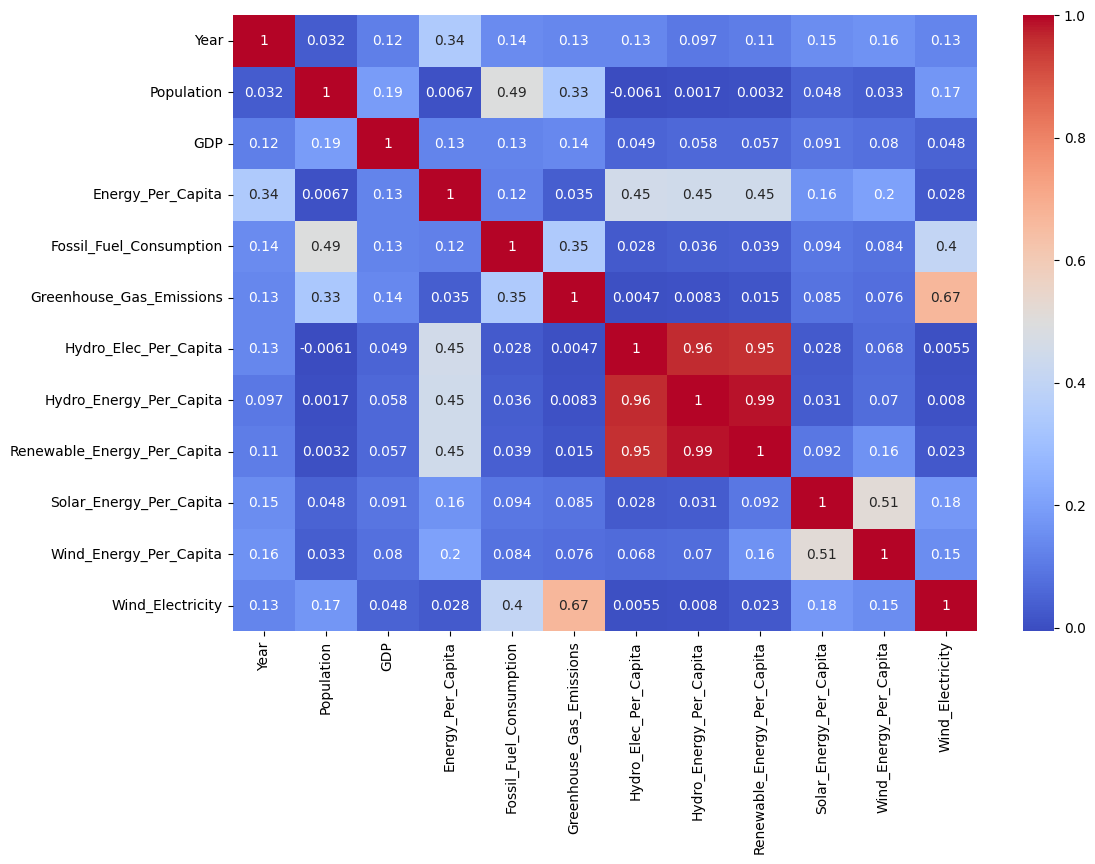

In [ ]:
# Visualizing relationships between features
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [80]:
# List of selected countries
countries = ['Asia', 'China', 'North America', 'Europe', 'India']

# Filter dataset for selected countries and years >= 1940
df_countries = df[(df['Country'].isin(countries)) & (df['Year'] >= 1940)]

# Ensure all years exist for each country
all_years = pd.DataFrame({'Year': range(1940, df['Year'].max() + 1)})

# Ensure all years exist for each country
df_complete = df_countries.groupby('Country').apply(lambda x: pd.merge(all_years, x, on='Year', how='left')).reset_index(drop=True)

#Ensure missing values are not included in the data.
df_complete['Energy_Per_Capita'] = df_complete['Energy_Per_Capita'].fillna(0)

In [81]:
import plotly.express as px

# Create the interactive line plot
fig = px.line(
    df_complete,
    x='Year',
    y='Energy_Per_Capita',
    color='Country',
    title='Interactive Energy Usage Per Capita Over Time by Country',
    labels={'Energy_Per_Capita': 'Energy Usage (kilowatts)', 'year': 'Year', 'country': 'Country'},
)

fig.update_layout(title_font_size=20, title_x=0.5)  # Center title
fig.show()

#### There are several reasons for the sudden increase in energy consumption in the late 1960s:

*   Increased car usage
*   Industrial expansion
*   More household appliance purchases/use
*   Abundant and cheap fossil fuels
*   Healthier economy





In [ ]:
# Viewing top 25 countries/regions with highest GHG Emissions
top_countries = df.groupby('Country')['Greenhouse_Gas_Emissions'].sum().nlargest(25).reset_index()
print(top_countries)

                                Country  Greenhouse_Gas_Emissions
0                           G20 (Ember)                 198810.44
1                                  Asia                 119077.93
2                          Asia (Ember)                 114208.71
3                 High-income countries                  99616.69
4                            G7 (Ember)                  70890.16
5                                 China                  64944.45
6                         North America                  48461.78
7                        Europe (Ember)                  39454.91
8                                Europe                  35739.73
9         Lower-middle-income countries                  29247.74
10                  European Union (27)                  21413.60
11                                India                  16132.02
12                                Japan                  11063.51
13                  Middle East (Ember)                  10295.33
14        

In [ ]:
# Selecting top 5 Countries/Regions with highest GHG Emissions
selected = ['Asia', 'China', 'North America', 'Europe', 'India']
df_selected = df[df['Country'].isin(selected)]

In [ ]:
# Grouping Country and GHG Emission data
df_grouped = df_selected.groupby('Country')['Greenhouse_Gas_Emissions'].sum().reset_index()

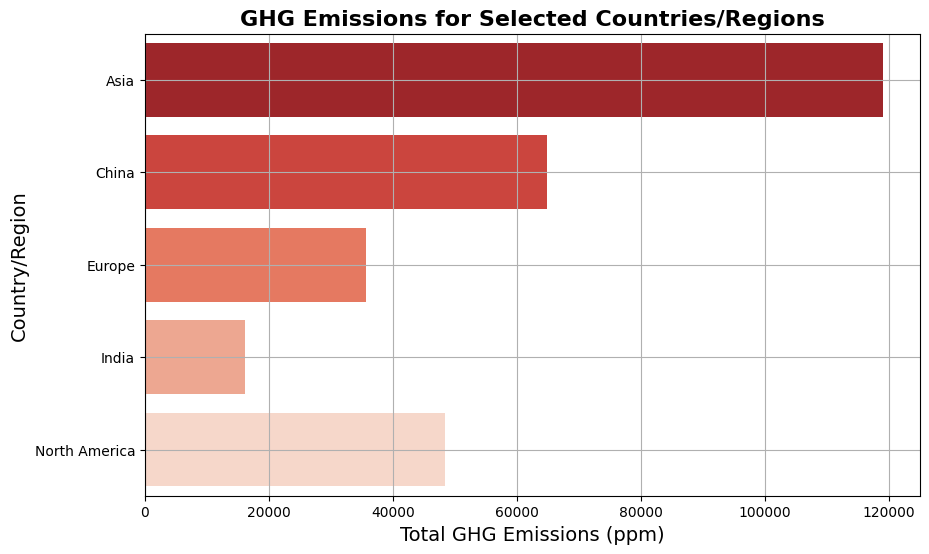

In [ ]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Greenhouse_Gas_Emissions', y='Country', data=df_grouped, palette='Reds_r')
plt.title('GHG Emissions for Selected Countries/Regions', fontsize=16, weight='bold')
plt.xlabel('Total GHG Emissions (ppm)', fontsize=14)
plt.ylabel('Country/Region', fontsize=14)
plt.grid(True)
plt.show()

#### According to the data, Asia has the highest GHG emissions of the five countries/regions with India having the least. This makes sense given India's lower per capita income, resulting in less energy consumption per capita. India also has a steady focus on renewable energy sources like solar energy and heavily promotes green initiatves.  

In [ ]:
# Grouping energy sources per capita by country
df_grouped = df_selected.groupby('Country')[['Hydro_Energy_Per_Capita',
                'Solar_Energy_Per_Capita', 'Wind_Energy_Per_Capita']].sum().reset_index()

<Figure size 1200x600 with 0 Axes>

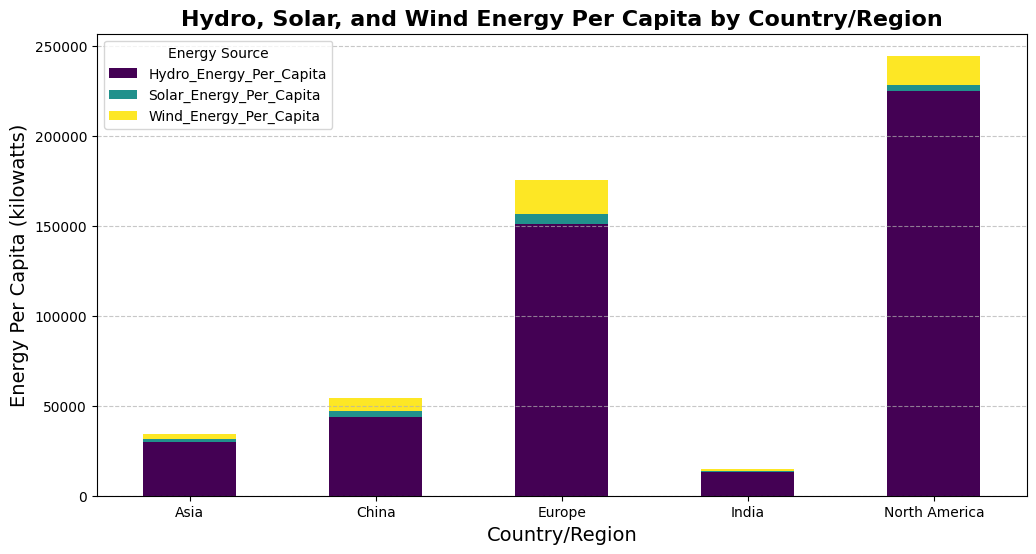

In [ ]:
# Plotting the data
plt.figure(figsize=(12,6))

# Creating stacked bar chart
df_grouped.set_index('Country').plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,6))

# Labels and Title
plt.title('Hydro, Solar, and Wind Energy Per Capita by Country/Region', fontsize=16, weight='bold')
plt.xlabel('Country/Region', fontsize=14)
plt.ylabel('Energy Per Capita (kilowatts)', fontsize=14)
plt.legend(title='Energy Source')
plt.xticks(rotation=0)

# Show grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

#### Hydro energy usage is the most popular renewable energy source. It makes sense that solar energy is the least used, as it is the most expenive renewable energy sources today. However, I'm surprised wind energy has not been implemented more, given its the cheapest of the three. Priced as low as 30 dollars per megawatt hour (compared to solar energy as high as 182 dollars per megawatt/hour), more countries/regions should invest in wind energy.